>**Import the libraies**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.model_selection import cross_val_score
import random
random.seed(42)
import os
print(os.listdir("../input"))


['potential_energy.csv', 'mulliken_charges.csv', 'train.csv', 'scalar_coupling_contributions.csv', 'sample_submission.csv', 'structures', 'test.csv', 'magnetic_shielding_tensors.csv', 'dipole_moments.csv', 'structures.csv']


> **Pre-processing**


> Load the data

In [2]:

pot_energy=pd.read_csv('../input/potential_energy.csv')
mulliken_charges=pd.read_csv('../input/mulliken_charges.csv')
train_df=pd.read_csv('../input/train.csv')
scalar_coupling_cont=pd.read_csv('../input/scalar_coupling_contributions.csv')
test_df=pd.read_csv('../input/test.csv')
magnetic_shield_tensor=pd.read_csv('../input/magnetic_shielding_tensors.csv')
dipole_moment=pd.read_csv('../input/dipole_moments.csv')
structures=pd.read_csv('../input/structures.csv')


> Let's see the shapes of our datasets

In [3]:
print('Shape of potential energy dataset:',pot_energy.shape)
print('Shape of mulliken_charges dataset:',mulliken_charges.shape)
print('Shape of train dataset:',train_df.shape)
print('Shape of scalar coupling contributions dataset:',scalar_coupling_cont.shape)
print('Shape of test dataset:',test_df.shape)
print('Shape of magnetic shielding tensors dataset:',magnetic_shield_tensor.shape)
print('Shape of dipole moments dataset:',dipole_moment.shape)
print('Shape of structures dataset:',structures.shape)

Shape of potential energy dataset: (85003, 2)
Shape of mulliken_charges dataset: (1533537, 3)
Shape of train dataset: (4658147, 6)
Shape of scalar coupling contributions dataset: (4658147, 8)
Shape of test dataset: (2505542, 5)
Shape of magnetic shielding tensors dataset: (1533537, 11)
Shape of dipole moments dataset: (85003, 4)
Shape of structures dataset: (2358657, 6)


> Let's explore our datasetes

In [4]:
#data types in dataset
print('Data Types:\n',pot_energy.dtypes)
#Descriptive statistics
print('Descriptive statistics:\n',np.round(pot_energy.describe(),3))
#Top few rows of dataset
pot_energy.head(6)

Data Types:
 molecule_name        object
potential_energy    float64
dtype: object
Descriptive statistics:
        potential_energy
count         85003.000
mean           -410.874
std              39.829
min            -714.626
25%            -438.001
50%            -416.922
75%            -387.219
max             -40.524


,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869
5,dsgdb9nsd_000008,-115.73030


> molecule_name - Name of the molecule,  
>potential_energy - Potential energy of the molecule

In [5]:
#data types in dataset
print('Data Types:\n',mulliken_charges.dtypes)
#Descriptive statistics
print('Descriptive statistics:\n',np.round(mulliken_charges.describe(),3))
#Top few rows of dataset
mulliken_charges.head(6)

Data Types:
 molecule_name       object
atom_index           int64
mulliken_charge    float64
dtype: object
Descriptive statistics:
         atom_index  mulliken_charge
count  1533537.000      1533537.000
mean         8.759           -0.000
std          5.593            0.225
min          0.000           -0.733
25%          4.000           -0.192
50%          9.000            0.099
75%         13.000            0.127
max         28.000            0.729


,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923
5,dsgdb9nsd_000002,0,-0.707143


> atom_index - Index of the atom in molecule,  
> mulliken_charge- Mulliken charge of the atom

In [6]:
#data types in dataset
print('Data Types:\n',train_df.dtypes)
#Descriptive statistics
print('Descriptive statistics:\n',np.round(train_df.describe(),3))
#Top few rows of dataset
train_df.head(6)

Data Types:
 id                            int64
molecule_name                object
atom_index_0                  int64
atom_index_1                  int64
type                         object
scalar_coupling_constant    float64
dtype: object
Descriptive statistics:
                 id            ...             scalar_coupling_constant
count  4658147.000            ...                          4658147.000
mean   2329073.000            ...                               15.922
std    1344691.357            ...                               34.942
min          0.000            ...                              -36.219
25%    1164536.500            ...                               -0.255
50%    2329073.000            ...                                2.281
75%    3493609.500            ...                                7.391
max    4658146.000            ...                              204.880

[8 rows x 4 columns]


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541


> atom_index_1 - atom indices of the atom-pair creating coupling,  
> type - scalar coupling type,  
> scalar_coupling_constant- scalar coupling constant that we want to predict (target variable)

In [7]:
#data types in dataset
print('Data Types:\n',scalar_coupling_cont.dtypes)
#Descriptive statistics
print('Descriptive statistics:\n',np.round(scalar_coupling_cont.describe(),3))
#Top few rows of dataset
scalar_coupling_cont.head(6)

Data Types:
 molecule_name     object
atom_index_0       int64
atom_index_1       int64
type              object
fc               float64
sd               float64
pso              float64
dso              float64
dtype: object
Descriptive statistics:
        atom_index_0  atom_index_1     ...               pso          dso
count   4658147.000   4658147.000     ...       4658147.000  4658147.000
mean         13.357         5.884     ...             0.375       -0.234
std           3.268         4.994     ...             0.742        0.930
min           0.000         0.000     ...            -3.288       -6.857
25%          11.000         2.000     ...            -0.035       -0.373
50%          13.000         5.000     ...             0.159       -0.065
75%          16.000         8.000     ...             0.435        0.143
max          28.000        28.000     ...             8.202        1.702

[8 rows x 6 columns]


,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013
5,dsgdb9nsd_000001,2,3,2JHH,-11.0317,0.352932,2.85856,-3.433950


> fc  - Fermi contact contribution,  
> sc  - Spin-dipolar contribution,  
> pso - Paramagnetic spin-orbit contribution,  
> dso - Diemagnetic spin-orbit contribution

In [8]:
#data types in dataset
print('Data Types:\n',test_df.dtypes)
#Descriptive statistics
print('Descriptive statistics:\n',np.round(test_df.describe(),3))
#Top few rows of dataset
test_df.head(6)

Data Types:
 id                int64
molecule_name    object
atom_index_0      int64
atom_index_1      int64
type             object
dtype: object
Descriptive statistics:
                 id  atom_index_0  atom_index_1
count  2505542.000   2505542.000   2505542.000
mean   5910917.500        13.354         5.878
std     723287.818         3.272         4.992
min    4658147.000         1.000         0.000
25%    5284532.250        11.000         2.000
50%    5910917.500        13.000         5.000
75%    6537302.750        16.000         8.000
max    7163688.000        28.000        28.000


,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC
5,4658152,dsgdb9nsd_000015,3,0,1JHC


In [9]:

#data types in dataset
print('Data Types:\n',magnetic_shield_tensor.dtypes)
#Descriptive statistics
print('Descriptive statistics:\n',np.round(magnetic_shield_tensor.describe(),3))
#Top few rows of dataset
magnetic_shield_tensor.head(6)

Data Types:
 molecule_name     object
atom_index         int64
XX               float64
YX               float64
ZX               float64
XY               float64
YY               float64
ZY               float64
XZ               float64
YZ               float64
ZZ               float64
dtype: object
Descriptive statistics:
         atom_index           XX     ...                YZ           ZZ
count  1533537.000  1533537.000     ...       1533537.000  1533537.000
mean         8.759       68.816     ...             0.027       82.620
std          5.593      114.787     ...            34.169       85.569
min          0.000    -3452.650     ...          -654.202     -948.603
25%          4.000       28.045     ...            -2.801       27.354
50%          9.000       31.909     ...             0.000       33.783
75%         13.000      148.043     ...             2.872      141.648
max         28.000      425.402     ...           738.415      556.884

[8 rows x 10 columns]


,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013
5,dsgdb9nsd_000002,0,275.6350,0.0003,0.0133,0.0003,275.6360,-0.0003,0.0161,-0.0004,237.4970


> XX, YX, ZX, XY, YY, ZY, XZ, YZ, ZZ- Elements of tensor/ matrix

> X, Y, Z - X, Y, & Z componets of dipole moments

In [10]:
#data types in dataset
print('Data Types:\n',structures.dtypes)
#Descriptive statistics
print('Descriptive statistics:\n',np.round(structures.describe(),3))
#Top few rows of dataset
structures.head(6)

Data Types:
 molecule_name     object
atom_index         int64
atom              object
x                float64
y                float64
z                float64
dtype: object
Descriptive statistics:
         atom_index            x            y            z
count  2358657.000  2358657.000  2358657.000  2358657.000
mean         8.757        0.095       -0.334        0.062
std          5.592        1.655        1.989        1.446
min          0.000       -9.235       -9.934       -9.135
25%          4.000       -0.875       -1.826       -0.842
50%          9.000        0.052       -0.404        0.011
75%         13.000        1.116        1.374        0.939
max         28.000        9.382       10.182        7.895


,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
5,dsgdb9nsd_000002,0,N,-0.040426,1.024108,0.062564


> x, y, & z - Cartesian co-oridnates of the atom

In [11]:
#Map the atom structure data into train & test datasets

def map_atom_data(df,atom_idx):
    df=pd.merge(df,structures,how='left',
               left_on=['molecule_name',f'atom_index_{atom_idx}'],
               right_on=['molecule_name','atom_index'])
    df=df.drop('atom_index',axis=1)
    df=df.rename(columns={'atom':f'atom_{atom_idx}',
                         'x':f'x_{atom_idx}',
                         'y':f'y_{atom_idx}',
                         'z':f'z_{atom_idx}'})
    return df
#train dataset
train_df=map_atom_data(train_df,0)
train_df=map_atom_data(train_df,1)
#test dataset
test_df=map_atom_data(test_df,0)
test_df=map_atom_data(test_df,1)


In [12]:
%%time
#Engineer a single feature: distance vector between atoms
# for train dataset
train_m_0=train_df[['x_0','y_0','z_0']].values
train_m_1=train_df[['x_1','y_1','z_1']].values
#for test dataset
test_m_0=test_df[['x_0','y_0','z_0']].values
test_m_1=test_df[['x_0','y_0','z_0']].values

#distance vector between atoms for train dataset
train_df['dist_vector']=np.linalg.norm(train_m_0-train_m_1,axis=1)
train_df['dist_X']=(train_df['x_0']-train_df['x_1'])**2
train_df['dist_Y']=(train_df['y_0']-train_df['y_1'])**2
train_df['dist_Z']=(train_df['z_0']-train_df['z_1'])**2

#distance vector between atoms for test dataset
test_df['dist_vector']=np.linalg.norm(test_m_0-test_m_1,axis=1)
test_df['dist_X']=(test_df['x_0']-test_df['x_1'])**2
test_df['dist_Y']=(test_df['y_0']-test_df['y_1'])**2
test_df['dist_Z']=(test_df['z_0']-test_df['z_1'])**2


CPU times: user 2.03 s, sys: 708 ms, total: 2.74 s
Wall time: 1.28 s


> > **References:-**     
> 1. https://www.kaggle.com/abhishek/competition-metric,   
> 2. https://www.kaggle.com/seriousran/just-speed-up-calculate-distance-from-benchmark,  
> 3. https://www.kaggle.com/inversion/atomic-distance-benchmark,    
> 4. https://www.kaggle.com/robikscube/exploring-molecular-properties-data

> Now let's check our train & test dataset

In [13]:
train_df['type_0']=train_df['type'].apply(lambda x:x)
test_df['type_0']=test_df['type'].apply(lambda x : x)


In [14]:
train_df=train_df.drop(columns=['molecule_name','type'],axis=1)
display(train_df.head(6))

,id,atom_index_0,atom_index_1,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist_vector,dist_X,dist_Y,dist_Z,type_0
0,0,1,0,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,0.000220,1.192105,0.000036,1JHC
1,1,1,2,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,1.019253,2.160261,0.000003,2JHH
2,2,1,3,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,0.294812,2.112831,0.771973,2JHH
3,3,1,4,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,1.783157,0.276638,2.085032,0.817978,2JHH
4,4,2,0,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952,1.049455,0.142844,0.000060,1JHC
5,5,2,3,-11.2541,H,1.011731,1.463751,0.000277,H,-0.540815,1.447527,-0.876644,1.783158,2.410399,0.000263,0.768989,2JHH


In [15]:
test_df=test_df.drop(columns=['molecule_name','type'],axis=1)
display(test_df.head(10))

,id,atom_index_0,atom_index_1,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist_vector,dist_X,dist_Y,dist_Z,type_0
0,4658147,2,0,H,-1.661639,0.000000,1.000000,C,0.599539,0.000000,1.000000,0.0,5.112926,0.000000,0.000000,2JHC
1,4658148,2,1,H,-1.661639,0.000000,1.000000,C,-0.599539,0.000000,1.000000,0.0,1.128054,0.000000,0.000000,1JHC
2,4658149,2,3,H,-1.661639,0.000000,1.000000,H,1.661639,0.000000,1.000000,0.0,11.044171,0.000000,0.000000,3JHH
3,4658150,3,0,H,1.661639,0.000000,1.000000,C,0.599539,0.000000,1.000000,0.0,1.128054,0.000000,0.000000,1JHC
4,4658151,3,1,H,1.661639,0.000000,1.000000,C,-0.599539,0.000000,1.000000,0.0,5.112926,0.000000,0.000000,2JHC
5,4658152,3,0,H,1.005284,1.810158,0.004656,C,-0.014821,1.392412,0.005671,0.0,1.040614,0.174511,0.000001,1JHC
6,4658153,3,2,H,1.005284,1.810158,0.004656,C,0.637949,-0.553297,-1.113582,0.0,0.134935,5.585919,1.250458,3JHC
7,4658154,3,4,H,1.005284,1.810158,0.004656,H,-0.546896,1.793435,-0.872511,0.0,2.409260,0.000280,0.769422,2JHH
8,4658155,3,5,H,1.005284,1.810158,0.004656,H,-0.530029,1.722920,0.911017,0.0,2.357185,0.007611,0.821490,2JHH
9,4658156,4,0,H,-0.546896,1.793435,-0.872511,C,-0.014821,1.392412,0.005671,0.0,0.283103,0.160819,0.771203,1JHC


Attributes like **atom_0**, & **atom_1** requires type converson from **obejcet** to **categorical** for proper understanding

In [16]:
#Type casting

# for train data
train_df['type_0']=train_df.type_0.astype('category')
#train_df['type']=train_df.type.astype('category')
train_df['atom_0']=train_df.atom_0.astype('category')
train_df['atom_1']=train_df.atom_1.astype('category')

#for test data
test_df['type_0']=test_df.type_0.astype('category')
#test_df['type']=test_df.type.astype('category')
test_df['atom_0']=test_df.atom_0.astype('category')
test_df['atom_1']=test_df.atom_1.astype('category')

> **Histograms for Data Visualization**

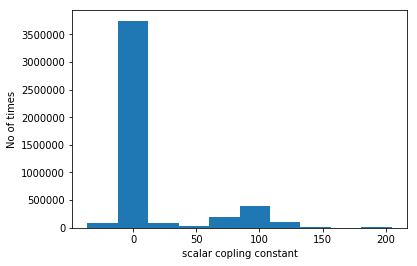

In [17]:
plt.hist(train_df['scalar_coupling_constant'])
plt.ylabel('No of times')
plt.xlabel('scalar copling constant')
plt.show()

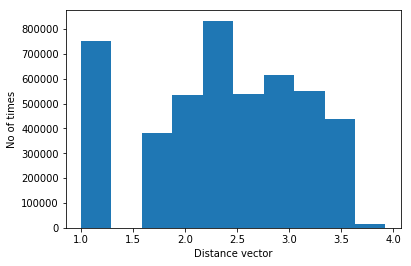

In [18]:
plt.hist(train_df['dist_vector'])
plt.ylabel('No of times')
plt.xlabel('Distance vector')
plt.show()

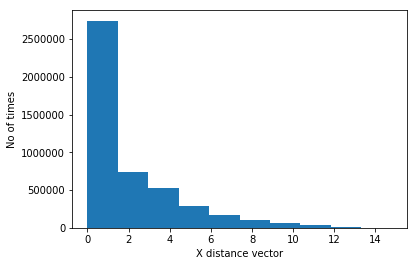

In [19]:
plt.hist(train_df['dist_X'])
plt.ylabel('No of times')
plt.xlabel('X distance vector')
plt.show()

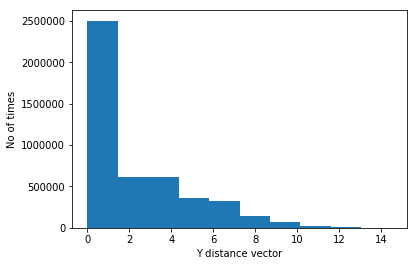

In [20]:
plt.hist(train_df['dist_Y'])
plt.ylabel('No of times')
plt.xlabel('Y distance vector')
plt.show()

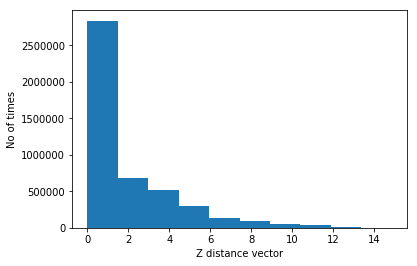

In [21]:
plt.hist(train_df['dist_Z'])
plt.ylabel('No of times')
plt.xlabel('Z distance vector')
plt.show()

**Feature engineering**

In [22]:
train_df.head(5)

,id,atom_index_0,atom_index_1,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist_vector,dist_X,dist_Y,dist_Z,type_0
0,0,1,0,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,0.000220,1.192105,0.000036,1JHC
1,1,1,2,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,1.019253,2.160261,0.000003,2JHH
2,2,1,3,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,0.294812,2.112831,0.771973,2JHH
3,3,1,4,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,1.783157,0.276638,2.085032,0.817978,2JHH
4,4,2,0,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952,1.049455,0.142844,0.000060,1JHC


> **Distribution plots using Seaborn**

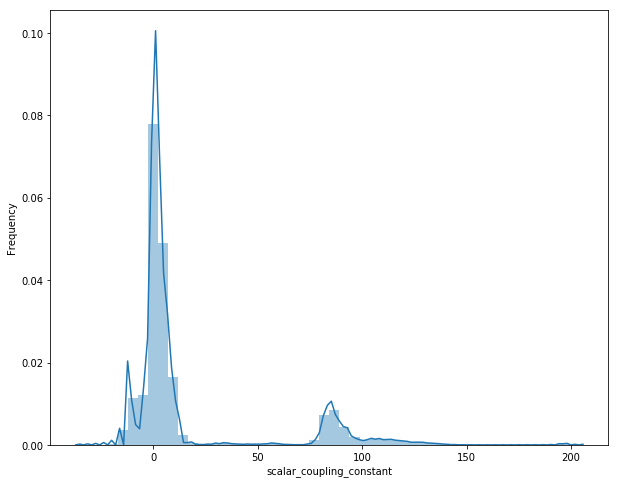

In [23]:
plt.figure(figsize=(10,8))
plt.ylabel('Frequency')
plt.xlabel('scalar coupling constant')
sn.distplot(train_df['scalar_coupling_constant'])

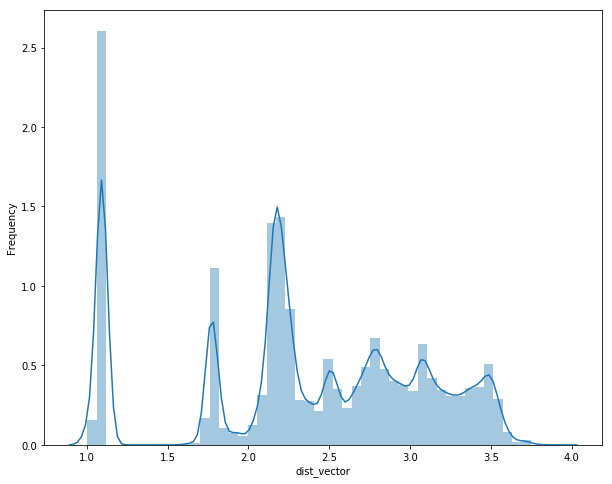

In [24]:
plt.figure(figsize=(10,8))
plt.ylabel('Frequency')
plt.xlabel('Distance vector')
sn.distplot(train_df['dist_vector'])

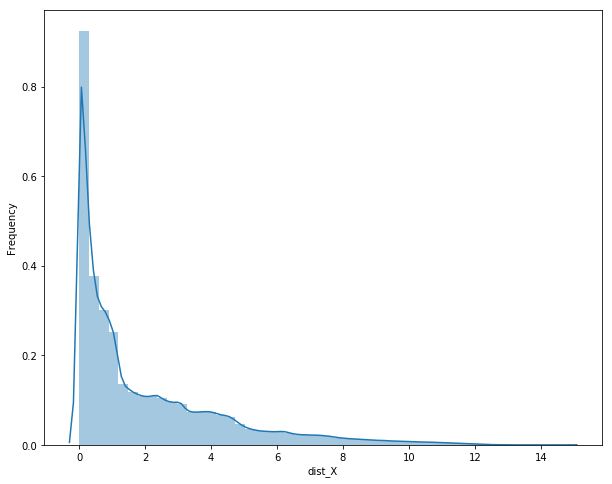

In [25]:
plt.figure(figsize=(10,8))
plt.ylabel('Frequency')
plt.xlabel('dist_X')
sn.distplot(train_df['dist_X'])

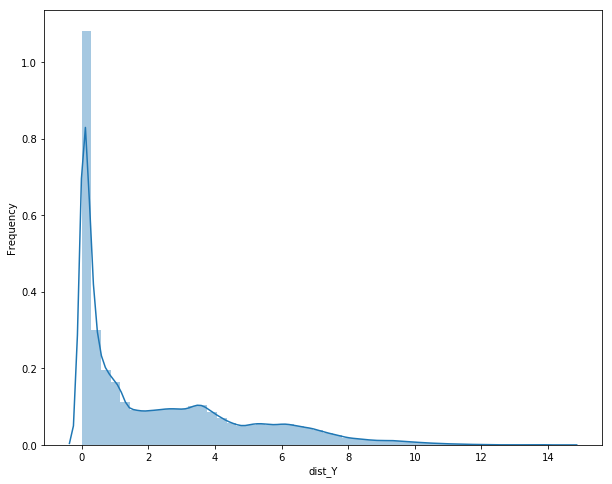

In [26]:
plt.figure(figsize=(10,8))
plt.ylabel('Frequency')
plt.xlabel('dist_Y')
sn.distplot(train_df['dist_Y'])

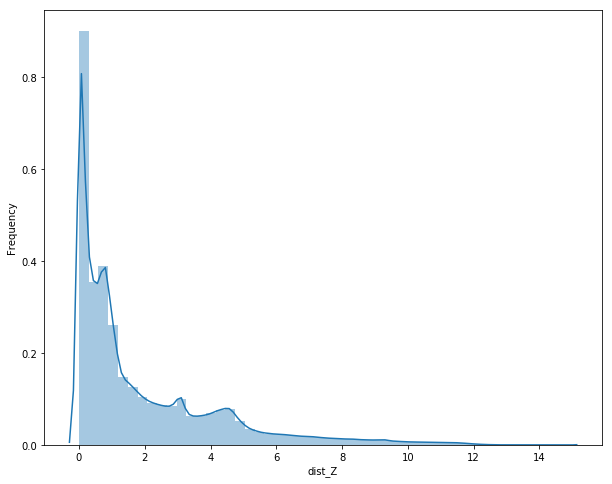

In [27]:
plt.figure(figsize=(10,8))
plt.ylabel('Frequency')
plt.xlabel('dist_Z')
sn.distplot(train_df['dist_Z'])

In [28]:
#Threshold for removing correalated values
#threshold=0.95
#Absolute value correlation matrix
#corr_matrix=train_df.corr().abs()

#Gettng the upper traingle of correlations
#upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [29]:
#select columns with correlations above threshold
#to_drop=[column for column in upper.columns if any(upper[column]>threshold)]
#print('There are are %d columns to remove.'%(len(to_drop)))

In [30]:
#train_df=train_df.drop(columns=to_drop)
#test_df=test_df.drop(columns=to_drop)
#print('Training data shape',train_df.shape)
#print('Testing data shape',test_df.shape)

In [31]:
Attributes=['atom_index_0','atom_index_1','type_0','x_0','y_0','z_0','atom_0',
            'atom_1','x_1','y_1','z_1','dist_vector','dist_X','dist_Y','dist_Z']
#categorical attributes
cat_attributes=['type_0','atom_0','atom_1']
target_label=['scalar_coupling_constant']
# split the data into X_train,X_test,& y_target

X_train=train_df[Attributes]
X_test=test_df[Attributes]
y_target=train_df[target_label]
            

In [32]:
#Transfrom categorical variables
X_train=pd.get_dummies(data=X_train,columns=cat_attributes)
X_test=pd.get_dummies(data=X_test,columns=cat_attributes)

In [33]:
print(X_train.shape,X_test.shape)

(4658147, 24) (2505542, 24)


In [34]:
display(y_target.shape)

(4658147, 1)

In [35]:
#Enocode the categorigal variables
#from sklearn.preprocessing import LabelEncoder
#for f in ['type','atom_index_0','atom_index_1','atom_0','atom_1']:
    #if f in good_columns:
       # lbl=LabelEncoder()
       # lbl.fit(list(X_train[f].values)+list(X_test[f].values))
       # X_train[f]=lbl.transform(list(X_train[f].values))
     #   X_test[f]=lbl.transform(list(X_test[f].values))


> Let's look at our transformed data

In [36]:


X_train.head(6)

,atom_index_0,atom_index_1,x_0,y_0,z_0,x_1,y_1,z_1,dist_vector,dist_X,dist_Y,dist_Z,type_0_1JHC,type_0_1JHN,type_0_2JHC,type_0_2JHH,type_0_2JHN,type_0_3JHC,type_0_3JHH,type_0_3JHN,atom_0_H,atom_1_C,atom_1_H,atom_1_N
0,1,0,0.002150,-0.006031,0.001976,-0.012698,1.085804,0.008001,1.091953,0.000220,1.192105,0.000036,1,0,0,0,0,0,0,0,1,1,0,0
1,1,2,0.002150,-0.006031,0.001976,1.011731,1.463751,0.000277,1.783120,1.019253,2.160261,0.000003,0,0,0,1,0,0,0,0,1,0,1,0
2,1,3,0.002150,-0.006031,0.001976,-0.540815,1.447527,-0.876644,1.783147,0.294812,2.112831,0.771973,0,0,0,1,0,0,0,0,1,0,1,0
3,1,4,0.002150,-0.006031,0.001976,-0.523814,1.437933,0.906397,1.783157,0.276638,2.085032,0.817978,0,0,0,1,0,0,0,0,1,0,1,0
4,2,0,1.011731,1.463751,0.000277,-0.012698,1.085804,0.008001,1.091952,1.049455,0.142844,0.000060,1,0,0,0,0,0,0,0,1,1,0,0
5,2,3,1.011731,1.463751,0.000277,-0.540815,1.447527,-0.876644,1.783158,2.410399,0.000263,0.768989,0,0,0,1,0,0,0,0,1,0,1,0


In [37]:
X_test.head(6)

,atom_index_0,atom_index_1,x_0,y_0,z_0,x_1,y_1,z_1,dist_vector,dist_X,dist_Y,dist_Z,type_0_1JHC,type_0_1JHN,type_0_2JHC,type_0_2JHH,type_0_2JHN,type_0_3JHC,type_0_3JHH,type_0_3JHN,atom_0_H,atom_1_C,atom_1_H,atom_1_N
0,2,0,-1.661639,0.000000,1.000000,0.599539,0.000000,1.000000,0.0,5.112926,0.000000,0.000000,0,0,1,0,0,0,0,0,1,1,0,0
1,2,1,-1.661639,0.000000,1.000000,-0.599539,0.000000,1.000000,0.0,1.128054,0.000000,0.000000,1,0,0,0,0,0,0,0,1,1,0,0
2,2,3,-1.661639,0.000000,1.000000,1.661639,0.000000,1.000000,0.0,11.044171,0.000000,0.000000,0,0,0,0,0,0,1,0,1,0,1,0
3,3,0,1.661639,0.000000,1.000000,0.599539,0.000000,1.000000,0.0,1.128054,0.000000,0.000000,1,0,0,0,0,0,0,0,1,1,0,0
4,3,1,1.661639,0.000000,1.000000,-0.599539,0.000000,1.000000,0.0,5.112926,0.000000,0.000000,0,0,1,0,0,0,0,0,1,1,0,0
5,3,0,1.005284,1.810158,0.004656,-0.014821,1.392412,0.005671,0.0,1.040614,0.174511,0.000001,1,0,0,0,0,0,0,0,1,1,0,0


In [38]:
y_target.head(6)

,scalar_coupling_constant
0,84.8076
1,-11.2570
2,-11.2548
3,-11.2543
4,84.8074
5,-11.2541


**Linear Regression model**

In [39]:

#from sklearn import linear_model
#linear_reg=linear_model.LinearRegression()
#n_folds=5
#Cross validation
#lin_reg_score=cross_val_score(linear_reg,X_train,y_target,
                         # scoring=make_scorer(mean_squared_error),
                          #cv=n_folds)
#lin_score=sum(lin_reg_score)/n_folds
#print('Lin_score:',lin_score)

In [40]:
#lr_model=linear_reg.fit(X_train,y_target)
#score=np.round(lr_model.score(X_train,y_target),3)
#print('Accuracy of trained model:',score)
#model_coeff=np.round(lr_model.coef_,3)
#print('Model coefficients:',model_coeff)
#model_intercept=np.round(lr_model.intercept_,3)
#print('Model intercept value:',model_intercept)

In [41]:
#model prediction
#from sklearn.metrics import r2_score
#y_pred=lr_model.predict(X_test)
#SCC=pd.read_csv('../input/sample_submission.csv')
#SCC['scalar_coupling_constant']= y_pred
#SCC.to_csv('Linear_Regression_model.csv',index=False)

> **Lasso Regression model**

In [42]:
%%time
#from sklearn import linear_model
#lasso=linear_model.Lasso(alpha=0.001)
#n_folds=5
#Cross validation
#lasso_score=cross_val_score(lasso,X_train,y_target,
                         # scoring=make_scorer(mean_squared_error),
                          #cv=n_folds)
#lasso_score=sum(lasso_score)/n_folds
#print('lasso_score:',lasso_score)
#print(lasso)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.3 µs


In [43]:
#lasso_model=lasso.fit(X_train,y_target)
#score=np.round(lasso_model.score(X_train,y_target),3)
#print('Accuracy of trained model:',score)

In [44]:
#model prediction
#y_pred=lasso_model.predict(X_test)
#SCC=pd.read_csv('../input/sample_submission.csv')
#SCC['scalar_coupling_constant']= y_pred
#SCC.to_csv('Lasso_Regression_model.csv',index=False)
#y_pred

In [45]:
#from sklearn import linear_model
#Elast=linear_model.ElasticNet(alpha=0.008,l1_ratio=0.5,random_state=42)
#n_folds=5
#Cross validation
#Elast_score=cross_val_score(Elast,X_train,y_target,
                          #scoring=make_scorer(mean_squared_error),
                          #cv=n_folds)
#Elast_score=sum(Elast_score)/n_folds
#print('Elast_score:',Elast_score)
#print(Elast)

In [46]:
#ElasticNet_model=linear_reg.fit(X_train,y_target)
#score=np.round(ElasticNet_model.score(X_train,y_target),3)
#print('Accuracy of trained model:',score)

In [47]:
#model prediction
#y_pred=ElasticNet_model.predict(X_test)
#SCC=pd.read_csv('../input/sample_submission.csv')
#SCC['scalar_coupling_constant']= y_pred
#SCC.to_csv('ElasticNet_Regression_model.csv',index=False)
#y_pred



**Light Gradient Boostng Machine**

> Hyperopt for Hyperparameter tuning (Bayesian optimization)

In [48]:
#Define hyper space
#from hyperopt import fmin,hp,tpe,Trials,space_eval,STATUS_OK,STATUS_RUNNING
#hyper_space={'objective':'regression',
            # 'metric':'mape',
             #'boosting':'gbdt',
             #'n_estimators':hp.choice('n_estimators',[100,250,450,600,850,1000,2000,3000,4000,5000]),
            # 'max_depth':hp.choice('max_depth',[5,10,15,20,25,30,35]),
             #'num_leaves':hp.choice('num_leaves',[45,60,95,125,145,200]),
             #'subsample':hp.choice('subsample',[.1,.2,.3,.4,0.5,0.6,0.7,0.8,0.9,1]),
             #'colsample_bytree': hp.choice('colsample_bytree',[.1,.2,.3,.4,.5,0.6,0.7,0.8,0.9,1.0]),
             #'learning_rate': hp.choice('learning_rate',[0.1,0.2,0.3,0.35,0.4,0.5]),
             #'reg_lambda': hp.choice('reg_lambda',[.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]),
            # 'reg_alpha': hp.choice('reg_alpha',[.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]),
            # 'min_child_samples':hp.choice('min_child_samples',[3,6,8,12,15])
           # }


In [49]:
#Defining the metric to score our optimizer
#def metric(df,pred):
    #df['diff']=(df['scalar_coupling_constant']-pred).abs()
    #return np.log(df.groupby([['type']])['diff'].mean().map(lambda x:max(x,1e-9))).mean()

In [50]:
#Split the train data into train(90%) & valid dataset(10%)
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_target,
                                               test_size=0.1, random_state=42)
#df_valid=pd.DataFrame({'type':X_valid['type']})
#df_valid['scalar_coupling_constant']=y_valid
print(X_train.shape,X_valid.shape)
print(y_train.shape,y_valid.shape)
#print(df_valid.shape)



(4192332, 24) (465815, 24)
(4192332, 1) (465815, 1)


In [51]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
#Create a function for Hyper parameters optimization
train_data=lgb.Dataset(X_train,label=y_train)
valid_data=lgb.Dataset(X_valid,label=y_valid)
#def evaluate_metric(params):
    #lgbm_model=lgb.train(params,train_data,500,
                             # valid_sets=[train_data,valid_data],
                            # early_stopping_rounds=20,verbose_eval=500)
   # pred=lgbm_model.predict(X_valid)
   # score=metric(df_valid,pred)
   # print(score)
   # return {
        #'loss':score,
        #'status':STATUS_OK,
       # 'staus running':STATUS_RUNNING
    #}
    

> **Initalzing the optimizer**

In [52]:
#from functools import partial
#Trial
#trials=Trials()
#set algorithm parameters
#algo=partial(tpe.suggest,n_startup_jobs=-1)
#set the no.of evaluations
#Max_evals=20
#Fit the Tree parzen estimator
#best_vals=fmin(evaluate_metric,space=hyper_space,verbose=1,
             # algo=algo,max_evals=Max_evals,trials=trials)



In [53]:
#print the best parameters
#best_params=space_eval(hyper_space,best_vals)
#print('Best Parameters from Hyperopt:\n'+str(best_params))

In [54]:
params={'boosting':'gbdt',
        'colsample_bytree':0.9,
        'learning_rate':0.2,
        'metric':'mae',
        'min_child_samples':25,
        'num_leaves':60,
        'reg_alpha':0.1,    #L1 regularization
        }

lgb_model=lgb.train(params,train_data,10000,valid_sets=[train_data,valid_data],verbose_eval=100,
                   early_stopping_rounds=100)


Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.29084	valid_1's l1: 2.29883
[200]	training's l1: 2.21176	valid_1's l1: 2.22659
[300]	training's l1: 2.16414	valid_1's l1: 2.18561
[400]	training's l1: 2.12245	valid_1's l1: 2.15039
[500]	training's l1: 2.08855	valid_1's l1: 2.12233
[600]	training's l1: 2.0611	valid_1's l1: 2.10058
[700]	training's l1: 2.03941	valid_1's l1: 2.08427
[800]	training's l1: 2.01739	valid_1's l1: 2.06769
[900]	training's l1: 1.99798	valid_1's l1: 2.05334
[1000]	training's l1: 1.98075	valid_1's l1: 2.04083
[1100]	training's l1: 1.96447	valid_1's l1: 2.02899
[1200]	training's l1: 1.94851	valid_1's l1: 2.01788
[1300]	training's l1: 1.93264	valid_1's l1: 2.0068
[1400]	training's l1: 1.91902	valid_1's l1: 1.99732
[1500]	training's l1: 1.90639	valid_1's l1: 1.98948
[1600]	training's l1: 1.89515	valid_1's l1: 1.98281
[1700]	training's l1: 1.88326	valid_1's l1: 1.97557
[1800]	training's l1: 1.87286	valid_1's l1: 1.9694
[1900]	traini

In [55]:
%%time
y_pred=lgb_model.predict(X_test,num_iteration=lgb_model.best_iteration)
#display(y_pred)
SCC=pd.read_csv('../input/sample_submission.csv')
SCC['scalar_coupling_constant']= y_pred
SCC.to_csv('LGBM_gbdt_model.csv',index=False)

CPU times: user 38min 27s, sys: 3.46 s, total: 38min 30s
Wall time: 9min 57s


**Regurized Greedy Forest (RGF) algorithm**

In [56]:
from rgf.sklearn import RGFRegressor,FastRGFRegressor
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.model_selection import cross_val_score


In [57]:
#%%time
#rgf=RGFRegressor(max_leaf=500,algorithm='RGF_Sib',test_interval=100,
               # loss='LS',verbose=False)
#n_folds=3
#rgf_scores = cross_val_score(rgf,
                             #X_train,
                            # y_target,
                             #scoring=make_scorer(mean_squared_error,greater_is_better=False),
                             #cv=n_folds)
#rgf_score=sum(rgf_scores)/n_folds
#print('rgf_score:',rgf_score)

In [58]:
#%%time
#Tran the model
#rgf_model=rgf.fit(X_train,y_target)

In [59]:
#%%time
#model prediction
#y_pred=rgf_model.predict(X_test)
#SCC=pd.read_csv('../input/sample_submission.csv')
#SCC['scalar_coupling_constant']= y_pred
#SCC.to_csv('RGF_model.csv',index=False)
#y_pred


**Fast Regurized Greedy Forest (RGF) algorithm**

In [60]:
%%time
#Frgf=FastRGFRegressor( opt_algorithm='rgf',
                     #l2=2000.0,
                     #min_child_weight=5.0,
                     #sparse_max_features=80000,
                    # sparse_min_occurences=5
                     #)
#Frgf=FastRGFRegressor(n_estimators=1000)
#n_folds=3
#Frgf_scores=cross_val_score(Frgf,X_train,y_target,
                         # scoring=make_scorer(mean_squared_error),
                          #cv=n_folds)
#Frgf_score=sum(Frgf_scores)/n_folds
#print('Frgf_score:',Frgf_score)
#print(Frgf)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.3 µs


In [61]:
#Train the model
#Frgf_model=Frgf.fit(X_train,y_target)

In [62]:
#model prediction
#y_pred=Frgf_model.predict(X_test)
#SCC=pd.read_csv('../input/sample_submission.csv')
#SCC['scalar_coupling_constant']= y_pred
#SCC.to_csv('FRGF_model.csv',index=False)
#y_pred
